In [1]:
import serial

serialPort = serial.Serial(port = "COM3", baudrate=921600,
                           bytesize=8, timeout=2, stopbits=serial.STOPBITS_ONE)

In [2]:
#Loading MNIST dataset
from tensorflow.keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
X_train=train_X.reshape(-1,784)
X_test=test_X.reshape(-1,784)

In [3]:
#Converting the pixel value to bytes.
import numpy as np
'''
print('Converting the integer pixel value to byte format for trainset.')
Byte_X_train=[]
for i in range(X_train.shape[0]):
    byte_X_train=[]
    for j in range(X_train.shape[1]):
        byte_X_train.append(bytes([X_train[i][j]]))
    Byte_X_train.append(byte_X_train)
'''    
print('Converting the integer pixel value to byte format for testset.')
Byte_X_test=[]
for i in range(X_test.shape[0]):
    byte_X_test=[]
    for j in range(X_test.shape[1]):
        byte_X_test.append(bytes([X_test[i][j]]))
    Byte_X_test.append(byte_X_test)

Converting the integer pixel value to byte format for testset.


## Testing for MNIST

********************Expected label is 5 *******************



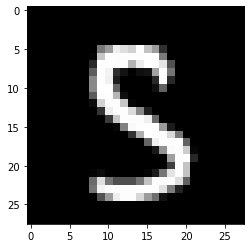

Sent bytes of 784 pixels.
-----------Received data from FPGA.-----------
Inference at FPGA: 5
Do you want to continue: press Y for yes and N for no.
n
Thank you for using decision tree inference in FPGA.


In [5]:
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure
while(1):
    serialPort.reset_input_buffer()
    serialPort.reset_output_buffer()
    sending_sample = np.random.randint(0,X_test.shape[0])
    print('********************Expected label is {} *******************\n'.format(test_y[sending_sample]))
    plt.imshow(test_X[sending_sample], cmap='gray')
    plt.show()
    print('Sent bytes of {} pixels.'.format(len(X_test[sending_sample])))
    serialString = ""                           # Used to hold data coming over UART
    for val in Byte_X_test[sending_sample]:
        sent_val = serialPort.write(val)
    #print('Number of bytes sent is: {}. '.format(sent_val))
    count_received_data = 0
    while(1):
        # Wait until there is data waiting in the serial buffer
        if(serialPort.in_waiting > 0):
            serialString = serialPort.readlines()
            print('-----------Received data from FPGA.-----------')
            for string in serialString:
                received_data=list(string)
                print(f'Inference at FPGA: {received_data[-1]}')
                count_received_data = count_received_data + len(received_data) 
            break
    print('Do you want to continue: press Y for yes and N for no.')
    continue_command = input()
    if continue_command == 'Y' or continue_command =='y':
        clear_output(wait=True)
    else:
        print('Thank you for using decision tree inference in FPGA.')
        break

# END

















<br> 












<br> 